In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import signal
import csv
from scipy import fft
from scipy.fftpack import fft, fftfreq, ifft
from scipy import interpolate

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,5)

In [2]:
data = np.loadtxt('anitaIVPhotogrammetry.csv', skiprows=2, delimiter=',')
datarows = np.transpose(data)

an = datarows[0]
x = datarows[1]*0.0254
y = datarows[2]*0.0254
z = datarows[3]*0.0254

print(len(data))

48


/tmp/ipykernel_5957/762430278.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


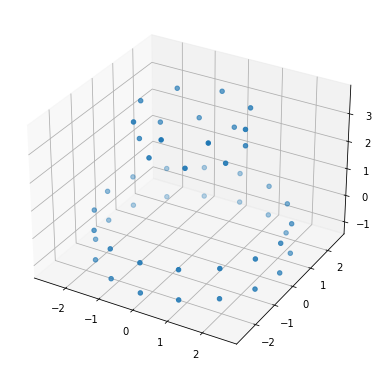

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)

[1. 0. 1.]


/tmp/ipykernel_5957/2061566245.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt3d = plt.figure().gca(projection='3d')


(-5.0, 5.0)

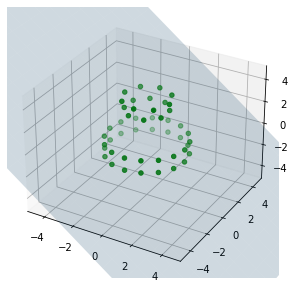

In [4]:
theta = 0.
phi = 0.

x0 = 0.
y0 = 0.
z0 = 0.
c = 299792458

startpos = (x0,y0,z0)
dt = 0

xn = x0+c*dt*np.cos(phi)*np.sin(theta)
yn = y0+c*dt*np.sin(phi)*np.sin(theta)
zn = z0+c*dt*np.cos(theta)
newpos = (xn, yn, zn)


point  = np.array([xn, yn, zn])
#normal = np.array([np.cos(phi)*np.sin(theta), np.sin(phi)*np.sin(theta), np.cos(theta)])
normal = np.array([1., 0., 1.])

print(normal)
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-10,10), range(-10,10))

# calculate corresponding z
zp = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zp, alpha=0.2)

ax = plt.gca()
ax.scatter(x,y,z, color='green')
ax.set_zlim(-5,5)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

In [5]:
fulldet = []
ants_0 = [[31.7, -18.3, -76.5],
          [39.6, -10.7, -51.6],
          [38.25, 0, -76.5],
          [39.6, 10.7 , -51.6]]

ants_1 = [[76.3, -44, -196],
          [85, -23, -196],
          [88, 0, -196],
          [85, 23, -196]]

ants_2 = [[76.3, -44, -224.75],
          [85, -23, -224.75],
          [88, 0, -224.75],
          [85, 23, -224.75]]

ants_3 = [[76.3, -44, -253.5],
          [85, -23, -253.5],
          [88, 0, -253.5],
          [85, 23, -253.5]]

ants_4 = [[54, -31.25, -345],
          [62, 0, -345]]
i=0
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_0:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1
        
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_1:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1

for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_2:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1
        
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_3:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1
        
for rotk in range(0,6):
    rotangle = rotk*60.
    for ant in ants_4:
        newx = (ant[0]*np.cos(np.radians(rotangle))-ant[1]*np.sin(np.radians(rotangle)))*0.0254
        newy = (ant[0]*np.sin(np.radians(rotangle))+ant[1]*np.cos(np.radians(rotangle)))*0.0254
        newz = ant[2]*0.0254
        fulldet.append([i,newx, newy, newz])
        i+=1

/tmp/ipykernel_5957/3657714219.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'z [m]')

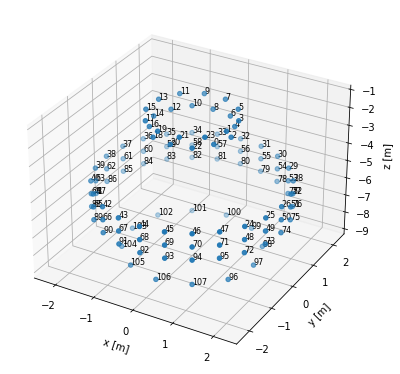

In [6]:
antn = [a[0] for a in fulldet]
antx = [a[1] for a in fulldet]
anty = [a[2] for a in fulldet]
antz = [a[3] for a in fulldet]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(antx,anty,antz)

for i, txt in enumerate(antn):
    ax.text(antx[i], anty[i], antz[i], txt, zorder=1, size=8)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

In [7]:
outfile = open("pueo_antpos.txt", "w")
outfile.write("antn, x, y, z\n")
for ant in fulldet:
    outfile.write("%s, %.4f, %.4f, %.4f\n"%(ant[0], ant[1], ant[2], ant[3]))


outfile.close()

In [8]:
ant_sector = np.concatenate([ants_0, ants_1, ants_2, ants_3, ants_4])

ants = []
for i, ant in enumerate(ant_sector):
    antphi = np.degrees(np.arctan(ant[2]/ant[1]))
    antel = -10.
    ants.append([i/0.0254, ant[0]*0.0254, ant[1]*0.0254, ant[2]*0.0254, antphi, antel])
ants = np.array(ants)
print(ants)

[[ 0.00000000e+00  8.05180000e-01 -4.64820000e-01 -1.94310000e+00
   7.65467647e+01 -1.00000000e+01]
 [ 3.93700787e+01  1.00584000e+00 -2.71780000e-01 -1.31064000e+00
   7.82849311e+01 -1.00000000e+01]
 [ 7.87401575e+01  9.71550000e-01  0.00000000e+00 -1.94310000e+00
  -9.00000000e+01 -1.00000000e+01]
 [ 1.18110236e+02  1.00584000e+00  2.71780000e-01 -1.31064000e+00
  -7.82849311e+01 -1.00000000e+01]
 [ 1.57480315e+02  1.93802000e+00 -1.11760000e+00 -4.97840000e+00
   7.73474435e+01 -1.00000000e+01]
 [ 1.96850394e+02  2.15900000e+00 -5.84200000e-01 -4.97840000e+00
   8.33071246e+01 -1.00000000e+01]
 [ 2.36220472e+02  2.23520000e+00  0.00000000e+00 -4.97840000e+00
  -9.00000000e+01 -1.00000000e+01]
 [ 2.75590551e+02  2.15900000e+00  5.84200000e-01 -4.97840000e+00
  -8.33071246e+01 -1.00000000e+01]
 [ 3.14960630e+02  1.93802000e+00 -1.11760000e+00 -5.70865000e+00
   7.89231255e+01 -1.00000000e+01]
 [ 3.54330709e+02  2.15900000e+00 -5.84200000e-01 -5.70865000e+00
   8.41569240e+01 -1.0000

/tmp/ipykernel_5957/2634459428.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  antphi = np.degrees(np.arctan(ant[2]/ant[1]))


/tmp/ipykernel_5957/353210826.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'z [m]')

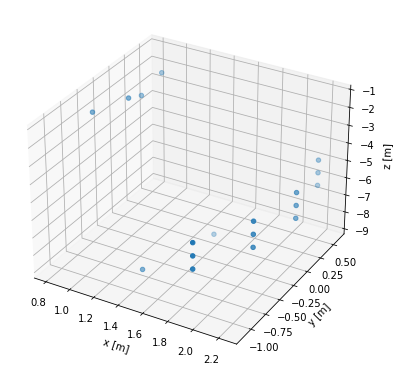

In [9]:
antn = [a[0] for a in ants]
antx = [a[1] for a in ants]
anty = [a[2] for a in ants]
antz = [a[3] for a in ants]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(antx,anty,antz)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

In [10]:
def dist_to_plane(planenorm, point, antpos):
    d = (planenorm[0]*antpos[0]+planenorm[1]*antpos[1]+planenorm[2]*antpos[2]-point.dot(planenorm))/np.sqrt(planenorm[0]**2+planenorm[1]**2+planenorm[2]**2)
    return d

def impulse(testtime, startphase):
    ir = np.genfromtxt('impResp2.csv')
    total_len = 1024
    front_pad = 30#int(testtime/0.333e-9)
    ir[0] = 0.119775

    ir3 = scipy.signal.resample_poly(ir, 3, 10)
    total_with_pad = 1536
    pad_end = total_with_pad - len(ir3) - front_pad
    ir3 = np.pad(ir3, [front_pad, pad_end], mode='constant')
    # These define our band. They'll be used for both signal and noise.
    hpsos = scipy.signal.butter(5, 0.1666, btype='highpass', output='sos')
    lpsos = scipy.signal.butter(5, 0.8, btype='lowpass', output='sos')
    ir3 = scipy.signal.sosfilt(lpsos, ir3)
    ir3 = scipy.signal.sosfilt(hpsos, ir3)
    # Now normalize to the peak. Note that we do this *here* after the highpass, but before any interpolation.
    ir3_p2p = np.amax(ir3)-np.amin(ir3)
    ir3 = ir3/(ir3_p2p/2)

    # Figure out the signal phase
    #ir3_phase = np.random.random_sample()
    ir3_phase = testtime/0.333e-9+startphase
    #print(ir3_phase)
    # shift it
    this_ir3 = scipy.ndimage.shift(ir3, ir3_phase)
    snr = 5
    # Noise is flat originally, shaped by bandpass
    noise = np.random.normal(0, 1, this_ir3.shape)
    noise = scipy.signal.sosfilt(lpsos, noise)
    noise = scipy.signal.sosfilt(hpsos, noise)
    # Scale the signal by desired SNR.
    rms = np.std(noise)
    noise /= rms
    this_ir3 = this_ir3*snr# + noise

    return this_ir3

def calc_hitangle(normal, antdir):
    antx = antdir[0]
    anty = antdir[1]
    antth = antdir[4]
    antphi = np.arctan(anty/antx)
    
    normx = normal[0]
    normy = normal[1]
    normz = normal[2]
    normphi = np.arctan(normy/normx)
    normth = np.arctan(-1.*normz/np.sqrt(normx**2+normy**2))
    
    dphi = np.abs(antphi-normphi)
    dth = np.abs(np.radians(antth)-normth)
    return (np.degrees(dphi), np.degrees(dth))

def apply_angresp_0(imp, hitth, hitphi):
    thgain = g_el_0(hitth)
    phigain = g_azi_0(hitphi)
    return imp*thgain*phigain

[0.98301265, 0.92905051, 0.74057787, 0.53461143, 0.30639118, 0.069796688]


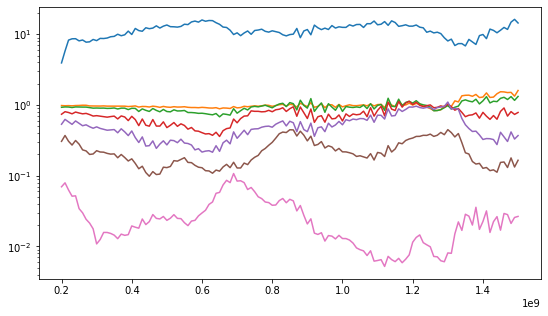

In [11]:
vpol_0 = np.loadtxt('vv_0')
vpol_0_trans = np.transpose(vpol_0)

freqs_0 = vpol_0_trans[0]
gains_0 = vpol_0_trans[1]

plt.semilogy(freqs_0, gains_0)

all_resp_el = []

els = [5,10,20,30,45,90]

for i, el in enumerate(els):
    lowind = int(131*i)
    highind = int(131*(i+1))
    vpol_el = np.loadtxt('vv_el')
    vpol_el = vpol_el[lowind:highind]
    all_resp_el.append(vpol_el)

    vpol_el_trans = np.transpose(vpol_el)

    freqs = vpol_el_trans[0]
    gains = vpol_el_trans[1]#*gains_0

    plt.plot(freqs, gains)
    
print([p[0][1] for p in all_resp_el])

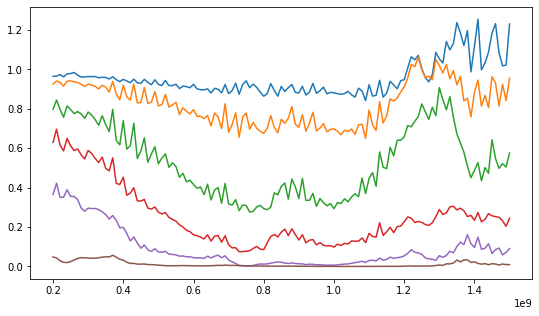

In [12]:
all_resp_az = []

azs = [5,10,20,30,45,90]

for i, az in enumerate(azs):
    lowind = int(131*i)
    highind = int(131*(i+1))
    vpol_az = np.loadtxt('vv_az')
    vpol_az = vpol_az[lowind:highind]
    all_resp_az.append(vpol_az)

    vpol_az_trans = np.transpose(vpol_az)

    freqs = vpol_az_trans[0]
    gains = vpol_az_trans[1]#*gains_0

    plt.plot(freqs, gains)
    


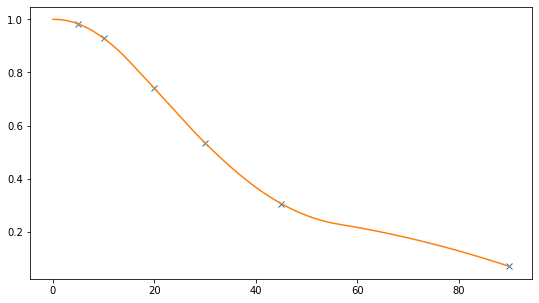

In [13]:
from scipy import interpolate

els = [5,10,20,30,45,90]
elgains = np.array([p[0][1] for p in all_resp_el])
plt.plot(els, elgains, 'x')

padx = np.array([0.])
pady = np.array([1.])
els = np.concatenate([padx, els])
elgains = np.concatenate([pady, elgains])

g_el_lin = interpolate.interp1d(els, elgains, kind='linear')
xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
yvals_lin = g_el_lin(xvals_lin)

g_el_0 = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')

xvals = np.linspace(0,90,180)
yvals = g_el_0(xvals)
plt.plot(xvals, yvals)


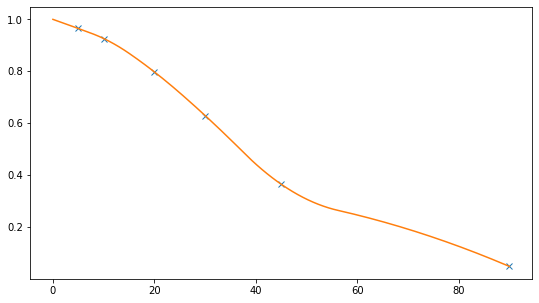

In [14]:
from scipy import interpolate

azis = [5,10,20,30,45,90]
azigains = np.array([p[0][1] for p in all_resp_az])
plt.plot(azis, azigains, 'x')

padx = np.array([0.])
pady = np.array([1.])
azis = np.concatenate([padx, azis])
azigains = np.concatenate([pady, azigains])

g_azi_lin = interpolate.interp1d(azis, azigains, kind='linear')
xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
yvals_lin = g_azi_lin(xvals_lin)

g_azi_0 = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')
xvals = np.linspace(0,90,180)
yvals = g_azi_0(xvals)
plt.plot(xvals, yvals)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54175841e-10
 2.54175841e-10 2.54175841e-10 2.54175841e-10 2.54175841e-10
 2.54175841e-10 9.91285778e-10 9.91285778e-10 9.91285778e-10
 2.20285728e-09 2.88065953e-09 4.10070356e-09 4.10070356e-09
 4.21508269e-09 4.77003327e-09]


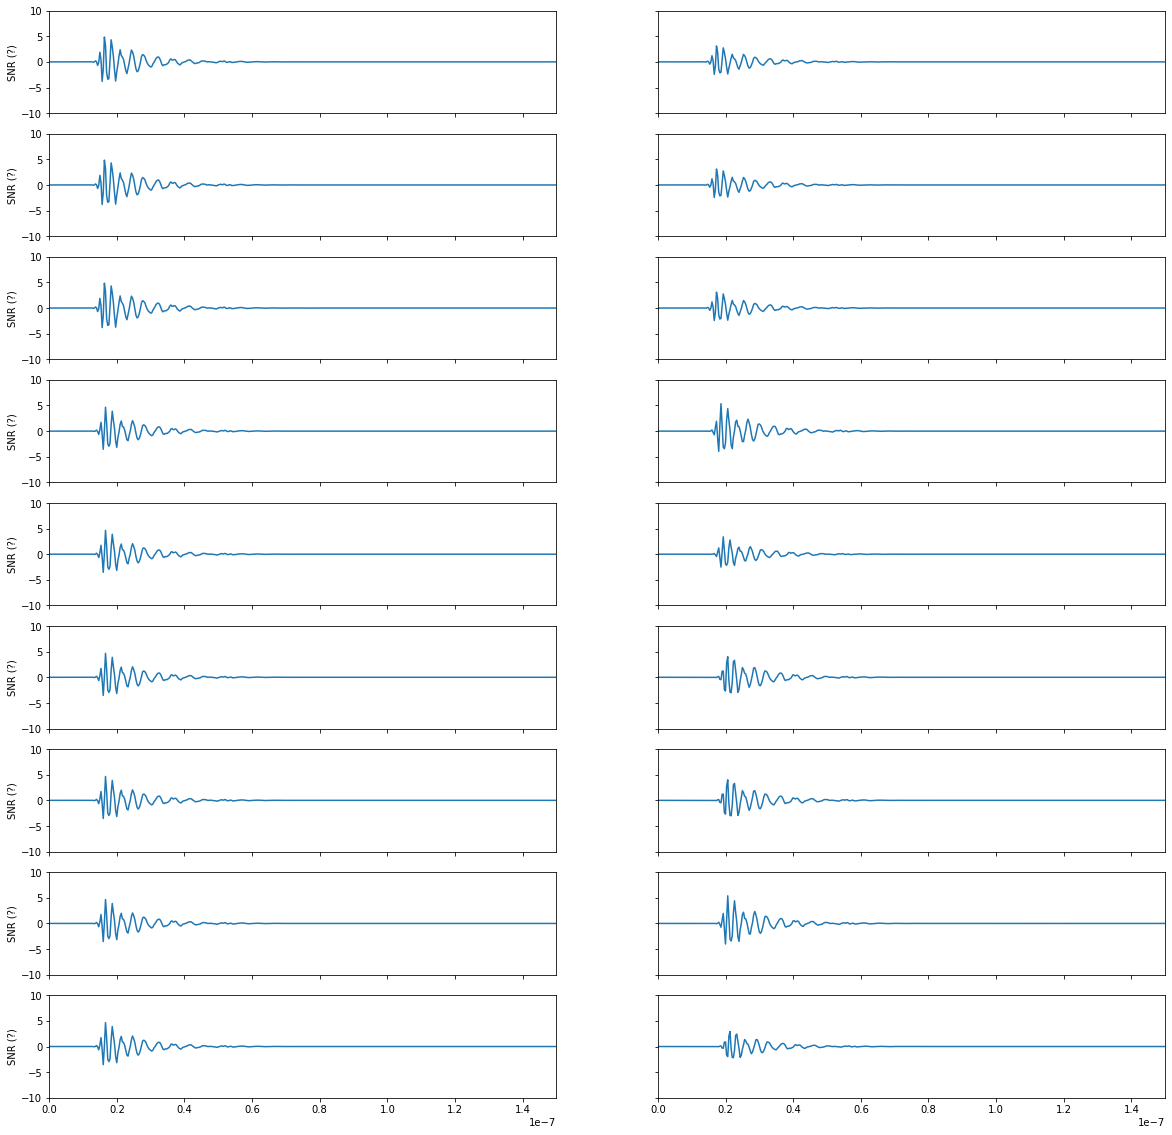

In [16]:
from operator import itemgetter

c = 299792458
total_len = 1024
front_pad = 30


normal = np.array([-1., 0., 0.])
point = np.array([0., 0., -100.])

temphits = []
for d in ants:
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)
print(newhittimes)

startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(9,2,sharex='col', sharey='row')

m=0
for testhit in adjhits:
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    
    after_angresp = apply_angresp_0(this_ir3, hitth, hitphi)
    
    t = np.arange(total_len)*(0.333e-9)

    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i,j].plot(t, after_angresp[0:total_len])
    ax[i,j].set_ylim(-10,10)
    ax[i,j].set_xlim(0,1.5e-7)
    m+=1
    
    if j == 0:
        ax[i,j].set_ylabel('SNR (?)')
    if i == 11:
        ax[i,j].set_xlabel('Time [s]')
plt.rcParams["figure.figsize"] = (9,5)


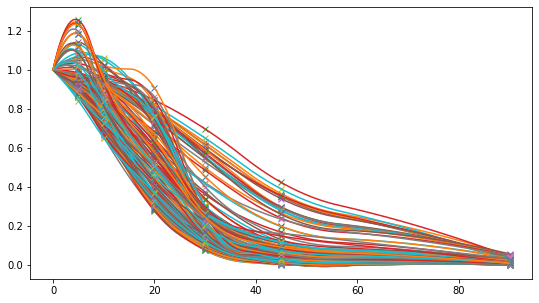

In [17]:
from scipy import interpolate
g_azis = []

for i in range(0,131):
    azis = [5,10,20,30,45,90]
    azigains = np.array([p[i][1] for p in all_resp_az])
    plt.plot(azis, azigains, 'x')

    padx = np.array([0.])
    pady = np.array([1.])
    azis = np.concatenate([padx, azis])
    azigains = np.concatenate([pady, azigains])

    g_azi_lin = interpolate.interp1d(azis, azigains, kind='linear')
    xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
    yvals_lin = g_azi_lin(xvals_lin)

    g_azi = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')
    xvals = np.linspace(0,90,180)
    yvals = g_azi(xvals)
    plt.plot(xvals, yvals)
    g_azis.append(g_azi)



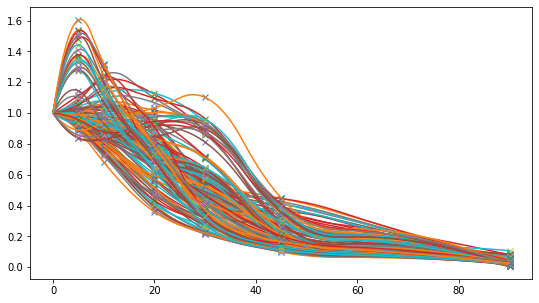

In [18]:
from scipy import interpolate

g_els = []
for i in range(0,131):
    els = [5,10,20,30,45,90]
    elgains = np.array([p[i][1] for p in all_resp_el])
    plt.plot(els, elgains, 'x')

    padx = np.array([0.])
    pady = np.array([1.])
    els = np.concatenate([padx, els])
    elgains = np.concatenate([pady, elgains])

    g_el_lin = interpolate.interp1d(els, elgains, kind='linear')
    xvals_lin = [0,5, 10, 20, 30, 45, 67.5, 90]
    yvals_lin = g_el_lin(xvals_lin)
    
    g_el = interpolate.interp1d(xvals_lin, yvals_lin, kind='quadratic')
    g_els.append(g_el)
    
    xvals = np.linspace(0,90,180)
    yvals = g_el(xvals)
    plt.plot(xvals, yvals)

freqs = np.concatenate([np.arange(0,2e8,1e7),freqs])    

In [19]:
def impulse(testtime, startphase):
    ir = np.genfromtxt('impResp2.csv')
    total_len = 1024
    front_pad = 30#int(testtime/0.333e-9)
    ir[0] = 0.119775

    ir3 = scipy.signal.resample_poly(ir, 3, 10)
    total_with_pad = 1536
    pad_end = total_with_pad - len(ir3) - front_pad
    ir3 = np.pad(ir3, [front_pad, pad_end], mode='constant')
    # These define our band. They'll be used for both signal and noise.
    hpsos = scipy.signal.butter(5, 0.1666, btype='highpass', output='sos')
    lpsos = scipy.signal.butter(5, 0.8, btype='lowpass', output='sos')
    ir3 = scipy.signal.sosfilt(lpsos, ir3)
    ir3 = scipy.signal.sosfilt(hpsos, ir3)
    # Now normalize to the peak. Note that we do this *here* after the highpass, but before any interpolation.
    ir3_p2p = np.amax(ir3)-np.amin(ir3)
    ir3 = ir3/(ir3_p2p/2)

    # Figure out the signal phase
    #ir3_phase = np.random.random_sample()
    ir3_phase = testtime/0.333e-9+startphase
    #print(ir3_phase)
    # shift it
    this_ir3 = scipy.ndimage.shift(ir3, ir3_phase)
    snr = 5
    # Noise is flat originally, shaped by bandpass
    noise = np.random.normal(0, 1, this_ir3.shape)
    noise = scipy.signal.sosfilt(lpsos, noise)
    noise = scipy.signal.sosfilt(hpsos, noise)
    # Scale the signal by desired SNR.
    rms = np.std(noise)
    noise /= rms
    this_ir3 = this_ir3*snr# + noise

    return this_ir3

def apply_angresp(imp, dth, dphi):
    freqresp = [g(dphi) for g in g_azis]
    freqresp = np.concatenate([np.zeros(20), freqresp])
    gains_freq_az = interpolate.interp1d(freqs, freqresp, kind='quadratic', bounds_error=False, fill_value=0.0)
    
    freqresp_th = [g(dth) for g in g_els]
    freqresp_th = np.concatenate([np.zeros(20), freqresp_th])
    gains_freq_th = interpolate.interp1d(freqs, freqresp_th, kind='quadratic', bounds_error=False, fill_value=0.0)
    
    tir3f = fft(imp)
    tir3f_freqs = fftfreq(len(tir3f), d=t[1]-t[0])
    scaled_amps_pos = tir3f[0:len(tir3f_freqs)//2]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])
    scaled_amps_neg = tir3f[len(tir3f_freqs)//2:]*gains_freq_az(tir3f_freqs[0:len(tir3f_freqs)//2])[::-1]
    scaled_amps = np.concatenate([scaled_amps_pos, scaled_amps_neg])
    
    itir3f = ifft(scaled_amps)  
    return itir3f

/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


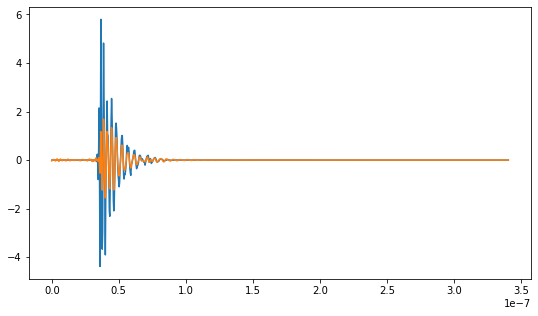

In [20]:
dphi = 30.
dth = 10.

t = np.arange(1024)*(0.333e-9)
this_ir3 = impulse(0.2e-7,np.random.random_sample())#[0:1024]
plt.plot(t, this_ir3[0:1024])

imp_azi = apply_angresp(this_ir3, dth, dphi)
plt.plot(t, imp_azi[0:1024])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54175841e-10
 2.54175841e-10 2.54175841e-10 2.54175841e-10 2.54175841e-10
 2.54175841e-10 9.91285778e-10 9.91285778e-10 9.91285778e-10
 2.20285728e-09 2.88065953e-09 4.10070356e-09 4.10070356e-09
 4.21508269e-09 4.77003327e-09]


/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplo

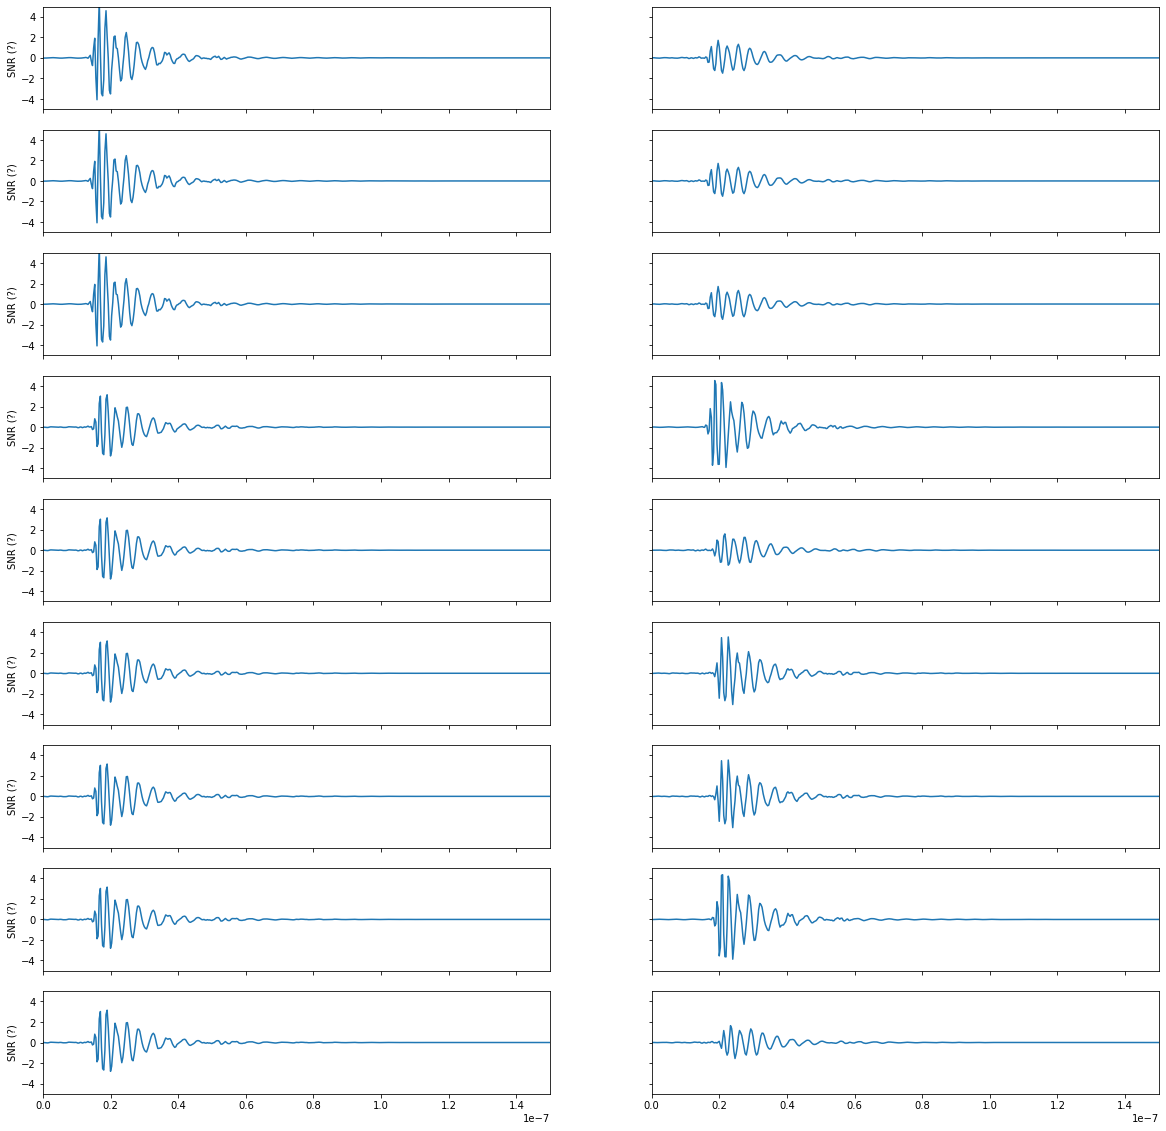

In [21]:
from operator import itemgetter

c = 299792458

normal = np.array([-1., 0., 0.])
point = np.array([100., 0., 0.])

temphits = []
for d in ants:
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)
print(newhittimes)

startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(9,2,sharex='col', sharey='row')

m=0
for testhit in adjhits:
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    
    after_angresp = apply_angresp(this_ir3, hitth, hitphi)
    
    t = np.arange(total_len)*(0.333e-9)

    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i,j].plot(t, after_angresp[0:total_len])
    ax[i,j].set_ylim(-5,5)
    ax[i,j].set_xlim(0,1.5e-7)
    m+=1
    
    if j == 0:
        ax[i,j].set_ylabel('SNR (?)')
    if i == 11:
        ax[i,j].set_xlabel('Time [s]')
plt.rcParams["figure.figsize"] = (9,5)

In [22]:
def make_noise(this_ir3):
    hpsos = scipy.signal.butter(5, 0.1666, btype='highpass', output='sos')
    lpsos = scipy.signal.butter(5, 0.8, btype='lowpass', output='sos')
    noise = np.random.normal(0, 1, this_ir3.shape)
    noise = scipy.signal.sosfilt(lpsos, noise)
    noise = scipy.signal.sosfilt(hpsos, noise)
    return noise

/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


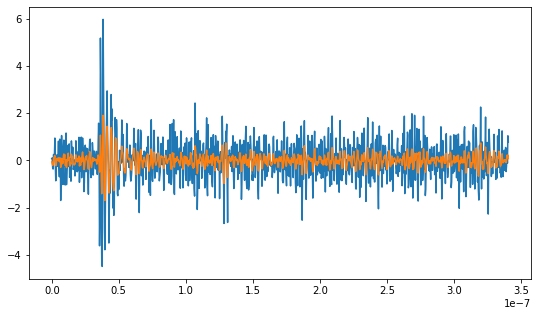

In [23]:
dphi = 30.
dth = 10.

t = np.arange(1024)*(0.333e-9)
this_ir3 = impulse(0.2e-7,np.random.random_sample())#[0:1024]
noise = make_noise(this_ir3)
this_ir3 = this_ir3+noise
plt.plot(t, this_ir3[0:1024])

imp_azi = apply_angresp(this_ir3, dth, dphi)
plt.plot(t, imp_azi[0:1024])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54175841e-10
 2.54175841e-10 2.54175841e-10 2.54175841e-10 2.54175841e-10
 2.54175841e-10 9.91285778e-10 9.91285778e-10 9.91285778e-10
 2.20285728e-09 2.88065953e-09 4.10070356e-09 4.10070356e-09
 4.21508269e-09 4.77003327e-09]


/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/william/.local/lib/python3.8/site-packages/matplo

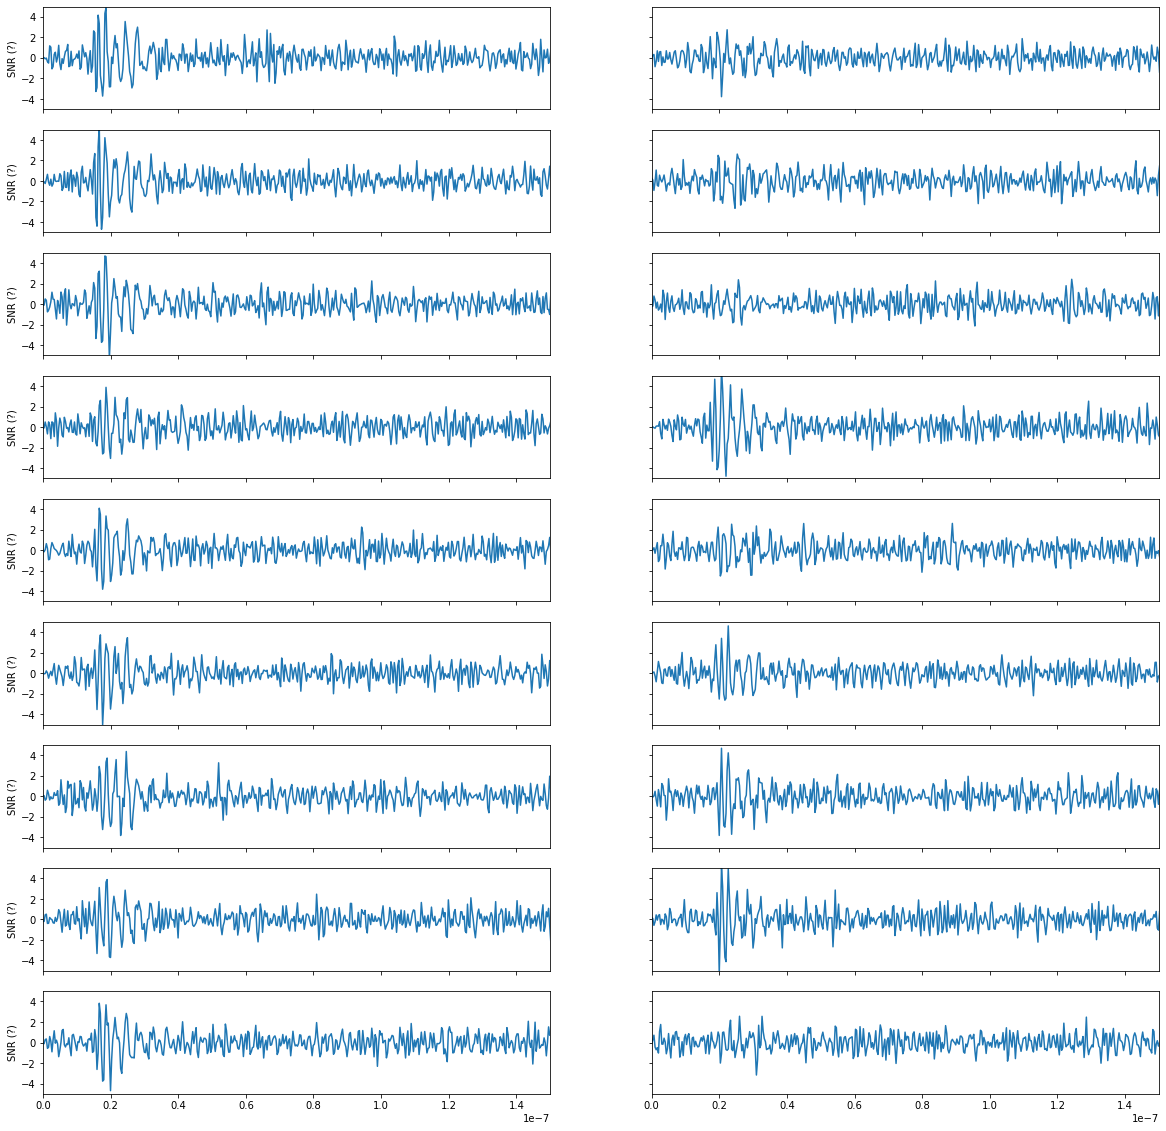

In [24]:
from operator import itemgetter

c = 299792458

normal = np.array([-1., 0., 0.])
point = np.array([100., 0., 0.])

temphits = []
for d in ants:
    antn = d[0]
    antpos = d[1:]
    d = dist_to_plane(normal, point, antpos)
    hittime = d/c
    hitangle =  calc_hitangle(normal, antpos)
    hitth = hitangle[1]
    hitphi = hitangle[0]
    #print(antpos, d, hittime)
    temphits.append([antn, antpos[0], antpos[1], antpos[2], hittime, hitphi, hitth])

temphits = np.array(temphits)
temphits = temphits[temphits[:,4].argsort()]
hittimes = [t[4] for t in temphits]
firsthit = hittimes[0]
tshift = firsthit# - 10e-9
newhittimes = hittimes-tshift

adjhits = [[temphits[i][0], temphits[i][1], temphits[i][2], temphits[i][3], newhittimes[i], temphits[i][5], temphits[i][6]] for i in range(0,len(temphits))]
adjhits = np.array(adjhits)
print(newhittimes)

startphase = np.random.random_sample()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

fig, ax = plt.subplots(9,2,sharex='col', sharey='row')

m=0
for testhit in adjhits:
    testtime = testhit[4]
    hitphi = testhit[5]
    hitth = testhit[6]

    this_ir3 = impulse(testtime, startphase)
    
    after_angresp = apply_angresp(this_ir3, hitth, hitphi)
    noise = make_noise(after_angresp)
    after_angresp = after_angresp+noise
    
    t = np.arange(total_len)*(0.333e-9)

    if 0<=m<9:
        j = 0
        i = m
    if 9<=m<18:
        j = 1
        i = m-9
    ax[i,j].plot(t, after_angresp[0:total_len])
    ax[i,j].set_ylim(-5,5)
    ax[i,j].set_xlim(0,1.5e-7)
    m+=1
    
    if j == 0:
        ax[i,j].set_ylabel('SNR (?)')
    if i == 11:
        ax[i,j].set_xlabel('Time [s]')
plt.rcParams["figure.figsize"] = (9,5)